# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
infile = open('data/pickles/demolished_buildings.pickle', 'rb')
demolished_buildings = pickle.load(infile)
infile.close()

In [3]:
type(demolished_buildings)

pandas.core.frame.DataFrame

In [4]:
demolished_buildings.head(4)

,policeprct,healtharea,zonedist1,zonedist2,zonedist3,overlay1,spdist1,spdist2,ltdheight,splitzone,...,factryarea,bldgfront,ext,irrlotcode,lottype,assesstot,yearbuilt,histdist,landmark,lifespan
82,13.0,5900.0,C1-8A,0,0,0,0,0,0,N,...,0.0,0.0,0,N,5.0,478592.0,1972,0,0,46
106,108.0,1021.0,R5D,0,0,0,0,0,0,N,...,0.0,0.0,0,Y,6.0,64380.0,1972,0,0,30
134,81.0,3100.0,C4-4L,0,0,0,0,0,0,N,...,0.0,72.0,E,N,5.0,1757700.0,1922,0,0,69
185,66.0,5310.0,C8-2,0,0,0,OP,0,0,N,...,0.0,0.0,0,Y,5.0,19350.0,1972,0,0,25


In [5]:
demolished_buildings['lotarea'].max()

3589501.0

In [6]:
demolished_buildings['lotarea'].min()

91.0

In [7]:
demolished_buildings['lotarea'].value_counts()

2500.0      215
2000.0      118
5000.0       84
4000.0       52
207185.0     44
           ... 
9890.0        1
36184.0       1
25549.0       1
3045.0        1
2880.0        1
Name: lotarea, Length: 1581, dtype: int64

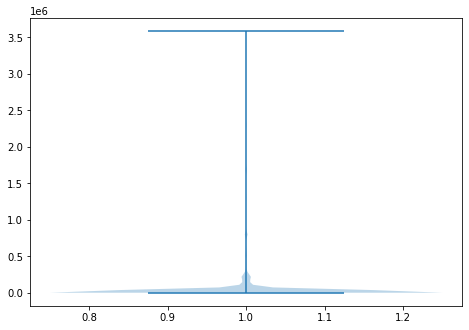

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
vp = ax.violinplot(demolished_buildings['lotarea'])
plt.show()

__Comments__

There are outliers in the lot area variable. These appear to be naturally occuring, not errors, so they will be kept.

In [9]:
demolished_buildings.lifespan.describe()

count    3543.000000
mean       51.820209
std        28.749460
min         1.000000
25%        31.000000
50%        43.000000
75%        75.000000
max       193.000000
Name: lifespan, dtype: float64

In [10]:
lifespan_min = demolished_buildings.lifespan.describe()[3]
lower_quartile = demolished_buildings.lifespan.describe()[4]
median = demolished_buildings.lifespan.describe()[5]
upper_quartile = demolished_buildings.lifespan.describe()[6]
lifespan_max = demolished_buildings.lifespan.describe()[7]

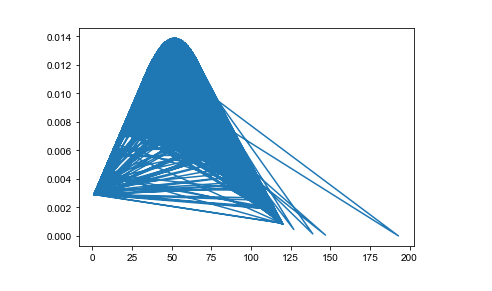

In [11]:
import scipy.stats as stats
import math

mu = demolished_buildings.lifespan.describe()[1]
variance = demolished_buildings.lifespan.var()

sigma = math.sqrt(variance)

x = demolished_buildings.lifespan

font_lg = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'normal',
        'size': 22,
        }

font_med = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'normal',
        'size': 18,
        }

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('Lifespan in Years', fontdict= font_med)
plt.ylabel('Probability', fontdict= font_med)
plt.title('Distribution of Lifespans of Demolished Buildings', fontdict= font_lg)
sns.set(rc={'figure.figsize':(20,30)}, style='ticks')
plt.style.use('dark_background')
plt.show()

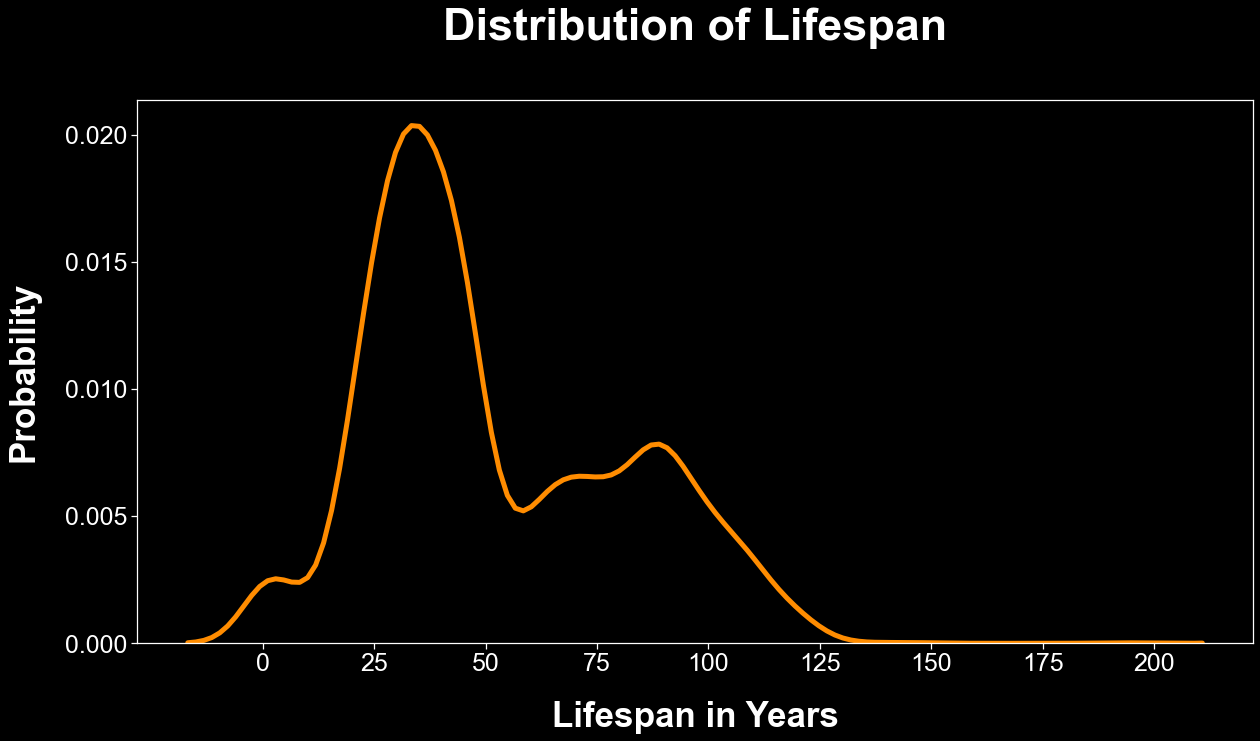

In [12]:
sns.set(rc={'figure.figsize':(20,10)}, style='ticks')
plt.style.use('dark_background')

sns.distplot(demolished_buildings.lifespan, hist=False, kde=True, kde_kws={'linewidth':5}, color='darkorange')

font_lg = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 45,
        }

font_med = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 35,
        }

plt.title('Distribution of Lifespan', fontdict=font_lg, y=1.1)
plt.xlabel('Lifespan in Years', fontdict=font_med, labelpad=25)
plt.ylabel('Probability', fontdict=font_med, labelpad=25)
plt.xticks(ticks=[0, 25, 50, 75, 100, 125, 150, 175, 200], fontsize=25)
plt.yticks(ticks=[0.0, 0.005, 0.01, 0.015, 0.02], fontsize=25);

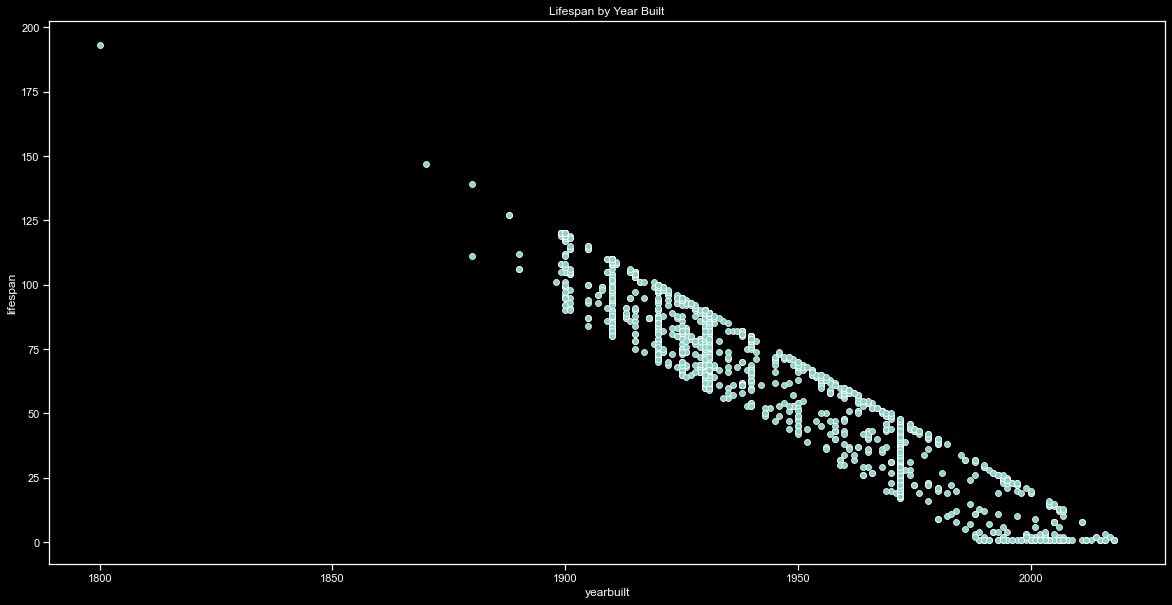

In [13]:
sns.set(rc={'figure.figsize':(20,10)}, style='ticks')
plt.style.use('dark_background')

sns.scatterplot(x=demolished_buildings['yearbuilt'], 
                y=demolished_buildings['lifespan'], palette='bright').set_title('Lifespan by Year Built');



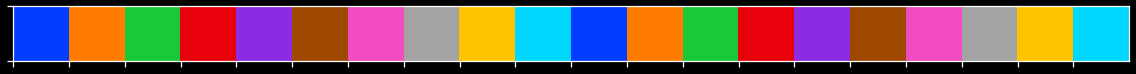

In [14]:
sns.palplot(sns.color_palette("bright", 20))

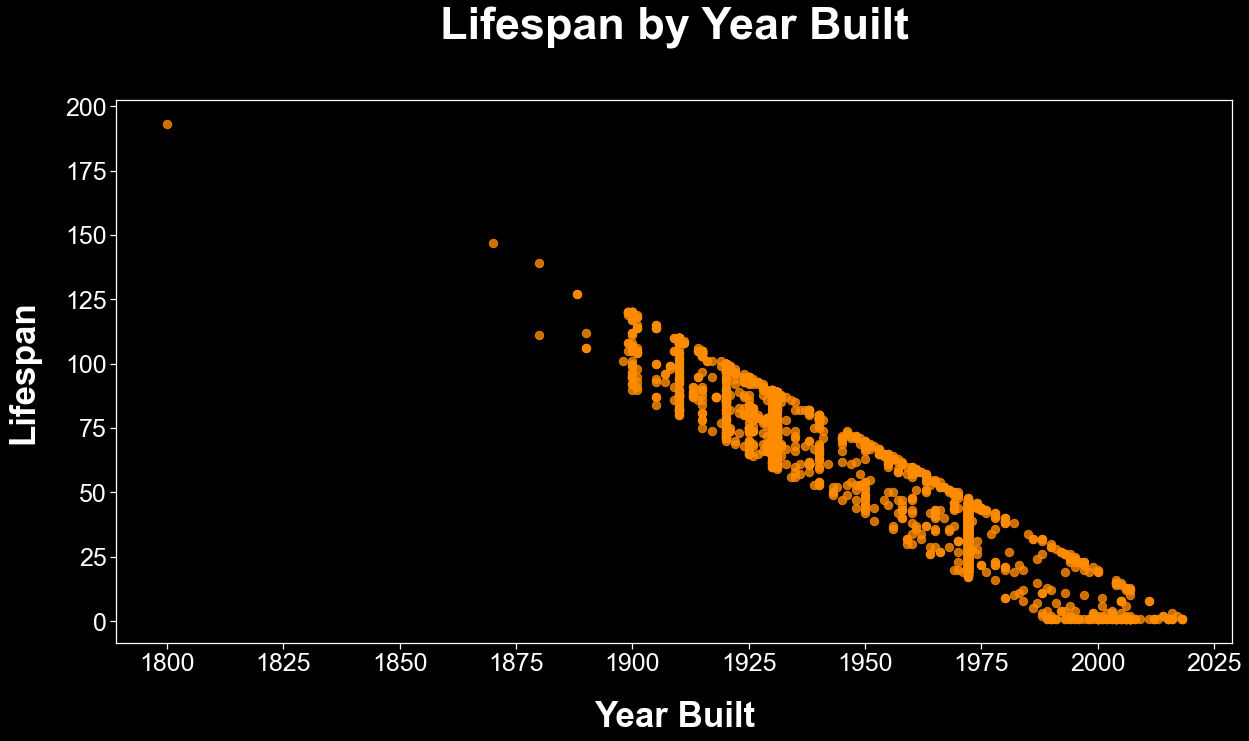

In [15]:
sns.regplot(x=demolished_buildings['yearbuilt'], 
                y=demolished_buildings['lifespan'], fit_reg=False, color='darkorange', scatter_kws={'s':70}
           ).set_title('Lifespan by Year Built');

font_lg = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 45,
        }

font_med = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 35,
        }

plt.title('Lifespan by Year Built', fontdict=font_lg, y=1.1)
plt.xlabel('Year Built', fontdict=font_med, labelpad=25)
plt.ylabel('Lifespan', fontdict=font_med, labelpad=25)
plt.xticks(ticks=[1800, 1825, 1850, 1875, 1900, 1925, 1950, 1975, 2000, 2025], fontsize=25)
plt.yticks(ticks=[0, 25, 50, 75, 100, 125, 150, 175, 200], fontsize=25);

## Lifespan by Type of Building

In [16]:
demolished_buildings.columns

Index(['policeprct', 'healtharea', 'zonedist1', 'zonedist2', 'zonedist3',
       'overlay1', 'spdist1', 'spdist2', 'ltdheight', 'splitzone', 'bldgclass',
       'ownertype', 'lotarea', 'strgearea', 'factryarea', 'bldgfront', 'ext',
       'irrlotcode', 'lottype', 'assesstot', 'yearbuilt', 'histdist',
       'landmark', 'lifespan'],
      dtype='object')

In [17]:
pd.set_option('max_rows', 1000)

In [18]:
demolished_buildings.bldgclass.value_counts()

V1    745
V0    514
G7    351
Z9    157
K1    143
C0    110
M1     89
C1     84
K4     76
E1     73
S2     60
E9     49
K2     49
O5     48
G1     45
G6     40
W9     37
C7     36
F5     34
G2     34
D1     28
O2     28
S9     25
C3     25
W1     24
Q1     23
P7     22
S1     22
K5     21
O7     20
C2     20
F4     19
S3     19
G0     17
D7     17
V3     17
R3     16
O6     16
O8     15
K9     14
S5     14
S4     12
N2     11
G9     11
F9     11
K7     10
M9     10
O4      9
Q2      9
O1      9
M3      8
C4      8
G5      8
W2      8
L8      8
G4      8
D6      7
E7      7
P9      7
G8      7
D9      7
F1      6
E2      6
I5      6
N9      6
T9      6
I1      6
U9      5
G3      5
K6      5
Y6      4
Z8      4
GU      4
P5      4
I6      4
C6      4
H3      4
V9      4
D3      3
J6      3
I9      3
O3      3
D5      3
W8      3
O9      3
C5      3
U2      3
Q6      3
P3      2
Z7      2
Z4      2
P8      2
Q9      2
V6      2
RW      2
I7      2
U0      2
Z3      2
Q3      2
J5      2


V1 = ZONED COMMERCIAL OR MANHATTAN RESIDENTIAL\
V0 = ZONED RESIDENTIAL; NOT MANHATTAN\
G7 = UNLICENSED PARKING LOT\
Z9 = OTHER MISCELLANEOUS\
K1 = ONE STORY RETAIL BUILDING\
C0 = THREE FAMILIES\
M1 = CHURCH, SYNAGOGUE, CHAPEL\
C1 = SIX UNIT OR GREATER HOME\
K4 = RETAIL WITH OTHER USES \
E1 = FIREPROOF WAREHOUSE\  
S2 = PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE\
K2 = MULTI-STORY RETAIL 
E9 = MISCELLANEOUS WAREHOUSE

V1    745\
V0    514\
G7    351\
Z9    157\
K1    143\
C0    110\
M1     89\
C1     84\
K4     76\
E1     73\
S2     60\
K2     49\
E9     49\
O5     48\
G1     45

In [42]:
Bldg_class_dict = {'Commercial Building': 745, 'Multifamily Residential': 514, 'Unidentified Building Type':157, 
                   'Single Story Retail':143, 'Three-Family Apartment': 110, 'Church/Synagogue':89, 
                   'Six Unit Apartment': 84, 'Retail Mixed Use': 76, 'Fireproof Warehouse':73, 
                   'Duplex with Retail or Office': 60, 'Multi-Story Retail': 49,
                  'Warehouse':49}

In [20]:
bldg_counts = list(Bldg_class_dict.values())
bldg_counts 

[745, 514, 157, 143, 110, 89, 84, 76, 73, 60, 49, 49]

In [43]:
building_types = list(Bldg_class_dict.keys())
building_types

['Commercial Building',
 'Multifamily Residential',
 'Unidentified Building Type',
 'Single Story Retail',
 'Three-Family Apartment',
 'Church/Synagogue',
 'Six Unit Apartment',
 'Retail Mixed Use',
 'Fireproof Warehouse',
 'Duplex with Retail or Office',
 'Multi-Story Retail',
 'Warehouse']

Text(0.5, 0, 'Number of Buildings Demolished')

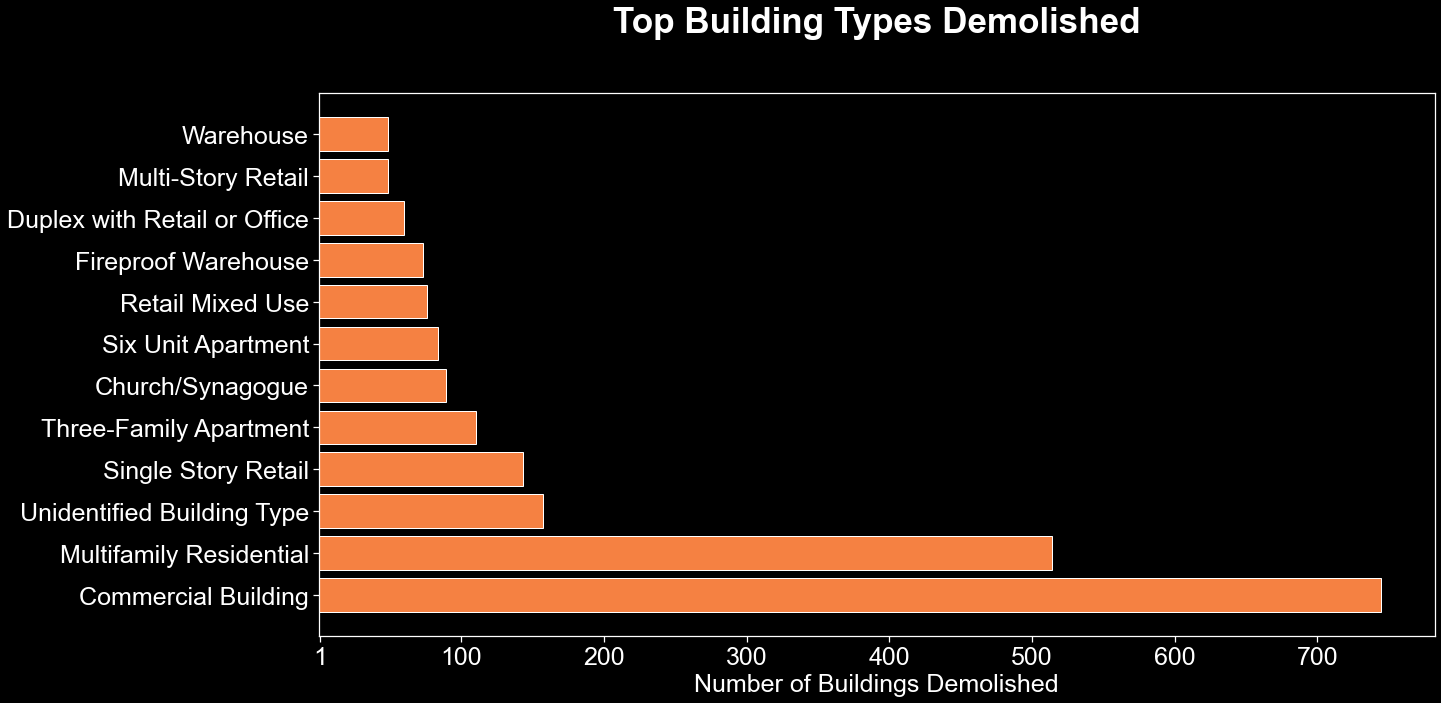

In [53]:
y_pos = np.arange(len(building_types))


font_med = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 25}

font_lg = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 35}

plt.barh(y_pos, bldg_counts, height=0.8, align='center', color='#f58142')
plt.title('Top Building Types Demolished', fontdict=font_lg, y=1.1);
plt.yticks(y_pos, building_types, fontsize=25)
plt.xticks(ticks=[1, 100, 200, 300, 400, 500, 600, 700], fontsize=25)
plt.xlabel('Number of Buildings Demolished', fontdict=font_med)

__Comment__

Need to filter out G7 because parking lots should not be included in the analysis. 

In [25]:
fig, ax = plt.subplots(figsize=(15,15))

y_pos = np.arange(len(building_types)
                  
#font_med = {'family': 'normal', 'weight':'regular', 'size': 16}

#font_lg = {'family': 'normal', 'weight':'bold', 'size': 20}
                  
ax.barh(y_pos, bldg_counts, align='center', color='#f58142')                  
plt.yticks(y_pos, fontsize=14)
ax.set_yticklables(building_types)
ax.invert_yaxis()
ax.set_xlabel('Test')
ax.set_title('Top Building Types Demolished');

SyntaxError: invalid syntax (<ipython-input-25-75158d30a125>, line 9)

In [ ]:
y_pos = np.arange(len(mean_growth_by_region))

fig, ax = plt.subplots(figsize=(8,8))

font_med = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 16}

font_lg = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}



ax.barh(y_pos, mean_growth_by_region, align='center', color='#ffc744')
ax.set_yticks(y_pos)
plt.xticks(fontsize=14)
ax.set_yticklabels(region_names, fontdict=font_med)
ax.invert_yaxis()
ax.set_xlabel('Percent Growth', fontdict=font_med)
ax.set_title('10-Year Mean Growth by Region', fontdict=font_lg);



## Do Buildings With a Higher Value get Demolished More or Less?


In [81]:
demolished_buildings.assesstot.describe()

count    3.543000e+03
mean     1.721344e+06
std      1.100804e+07
min      0.000000e+00
25%      6.324000e+04
50%      2.074500e+05
75%      8.190000e+05
max      3.206007e+08
Name: assesstot, dtype: float64

In [82]:
demolished_buildings.assesstot.min()

0.0

In [83]:
demolished_buildings.assesstot.max()

320600700.0

In [ ]:
demolished_buildings['value_under_50k'] = np.where(demolished_buildings.assesstot < 50000, 1, 0)

In [ ]:
#make a column for zonedist1 residential, 1 means it is in a residential zone, 0 means it's not
demolished_buildings['zonedist1_R'] = np.where(demolished_buildings.zonedist1.str.startswith('R'), 1, 0)

__Comments__

assesstot would be the assessed value of the land since this data was created after the building was demolished.
Not applicable.

In [54]:
demolished_buildings.columns

Index(['policeprct', 'healtharea', 'zonedist1', 'zonedist2', 'zonedist3',
       'overlay1', 'spdist1', 'spdist2', 'ltdheight', 'splitzone', 'bldgclass',
       'ownertype', 'lotarea', 'strgearea', 'factryarea', 'bldgfront', 'ext',
       'irrlotcode', 'lottype', 'assesstot', 'yearbuilt', 'histdist',
       'landmark', 'lifespan'],
      dtype='object')

In [55]:
demolished_buildings.ltdheight.value_counts()

0        3541
LH-1        1
LH-1A       1
Name: ltdheight, dtype: int64

In [56]:
demolished_buildings.lottype.value_counts()

5.0    2483
3.0     879
4.0      84
1.0      48
6.0      21
2.0      14
0.0      11
8.0       2
7.0       1
Name: lottype, dtype: int64

In [59]:
lottype_dict = {'Inside': 2483, 'Corner': 879, 'Through':84, 'Block Assemblage':48, 
                'Interior Lot':21, 'Waterfront':14, 'Unknown':11, 'Alley': 2, 'Island': 1}

In [79]:
inside_lots = round(lottype_dict['Inside']/len(demolished_buildings) *100,2)

corner_lots = round(lottype_dict['Corner']/len(demolished_buildings) *100,2)

through_lots = round(lottype_dict['Through']/len(demolished_buildings) *100,2)

block_lots = round(lottype_dict['Block Assemblage']/len(demolished_buildings) *100,2)

interior_lots = round(lottype_dict['Interior Lot']/len(demolished_buildings) *100,2)

waterfront_lots = round(lottype_dict['Waterfront']/len(demolished_buildings) *100,2)

alley_lots = round(lottype_dict['Alley']/len(demolished_buildings) *100,2)

island_lots = round(lottype_dict['Island']/len(demolished_buildings) *100,2)

In [80]:
lot_list = [inside_lots, corner_lots, through_lots, block_lots, interior_lots, 
            waterfront_lots, alley_lots, island_lots]

lot_list

[70.08, 24.81, 2.37, 1.35, 0.59, 0.4, 0.06, 0.03]

In [81]:
lot_list[0]

70.08

''

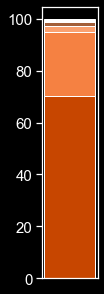

In [132]:
fig, ax = plt.subplots(figsize=(1,5))

barwidth=1

bar1 = lot_list[0]
bar2 = lot_list[1]
bar3 = lot_list[2]
bar4 = lot_list[3]
bar5 = lot_list[4]
bar6 = lot_list[5]
bar7 = lot_list[6]
bar8 = lot_list[7]

plt.bar(1, bar1, color='#c74600', edgecolor='white', width=barwidth)
plt.bar(1, bar2, bottom=bar1, color='#f58142', edgecolor='white', width=barwidth)
plt.bar(1, bar3, bottom=bar2+bar1, color='#faa170', edgecolor='white', width=barwidth)
plt.bar(1, bar4, bottom=bar3+bar2+bar1, color='#a35f39', width=barwidth)
plt.bar(1, bar5, bottom=bar4+bar3+bar2+bar1, color='#f9bc89',width=barwidth)
plt.bar(1, bar6, bottom=bar5+bar4+bar3+bar2+bar1, color='#f9bc90', width=barwidth)
plt.bar(1, bar7, bottom=bar6+bar5+bar4+bar3+bar2+bar1, color='#f9bc91', width=barwidth)
plt.bar(1, bar8, bottom=bar7+bar6+bar5+bar4+bar3+bar2+bar1, color='#f9bc92', width=barwidth)

#plt.xlabel('Lot Types')
plt.xticks([], fontsize=25)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)
;

__Comments__

Decided to do this in illustrator instead.